## 1. 바닐라 RNN의 한계
바닐라 RNN이 이전의 계산 결과에 의존하지만 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이는 단점이 있다. 시점(time step)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못한다. => **장기 의존성 문제(The problem of Long-Term Dependencies)**

## 2. 바닐라 RNN 내부 열어보기
*편향 b 생략*

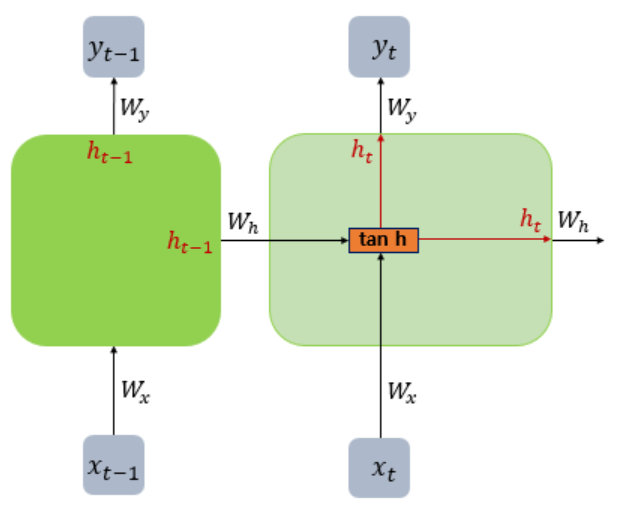

In [2]:
from IPython.display import Image
Image('./data/바닐라RNN 내부.png')

## 3. LSTM(Long Short-Term Memory)
* 전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)
* 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다.
* 은닉 상태(hidden state)를 계산하는 식이 복잡해졌고 셀 상태(cell state)라는 값이 추가된 형태

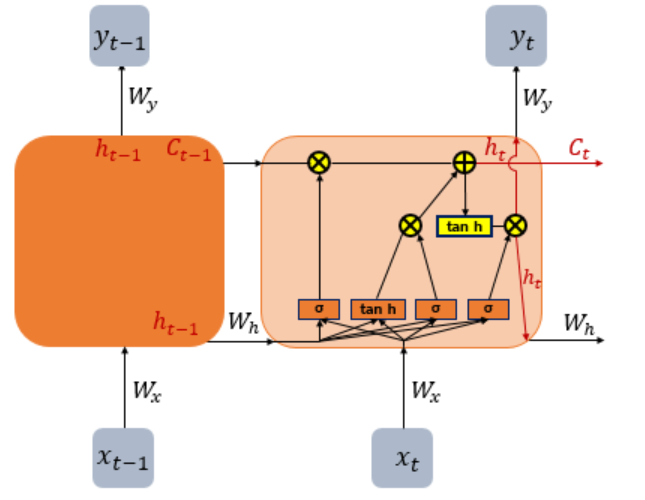

In [3]:
from IPython.display import Image
Image('./data/LSTM 내부.png')

### (1) 입력 게이트
*tanh는 하이퍼볼릭탄젠트 함수, 시그마는 시그모이드 함수*

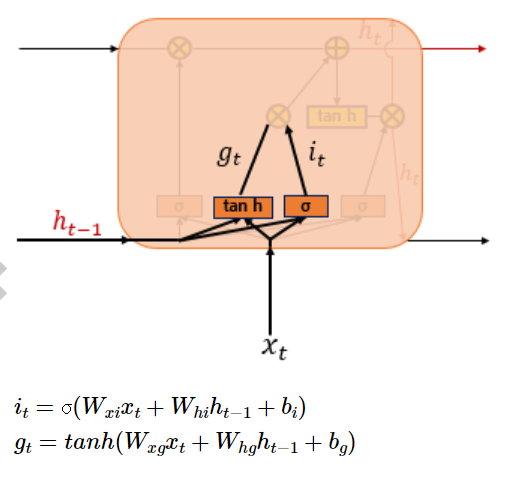

In [6]:
from IPython.display import Image
Image('./data/LSTM 입력게이트.png')

* 입력 게이트는 현재 정보를 기억하기 위한 게이트


### (2) 삭제 게이트

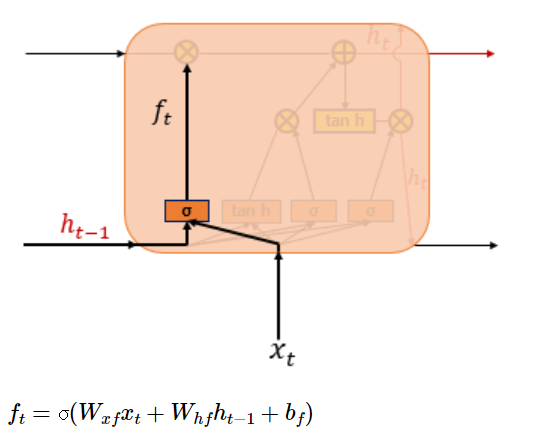

In [7]:
from IPython.display import Image
Image('./data/LSTM 삭제게이트.png')

* 기억을 삭제하기위한 게이트
* 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것

### (3) 셀 상태(장기 상태)

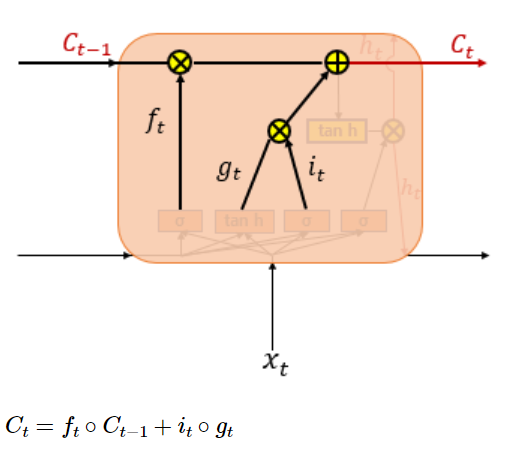

In [8]:
from IPython.display import Image
Image('./data/LSTM 셀 상태.png')

* 삭제 게이트에서 일부 기억을 잃은 상태
* 입력 게이트에서 구한 it, gt 두 값에 대해서 원소별 곱(entrywise product)을 진행 - 같은 크기의 두 행렬에 같은 위치의 성분끼리 곱하는 것 => 선택된 기억할 값
* 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더한다.
* 이 값이 현재 시점 t의 셀 상태, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨진다.

### (4) 출력 게이트와 은닉 상태(단기 상태)

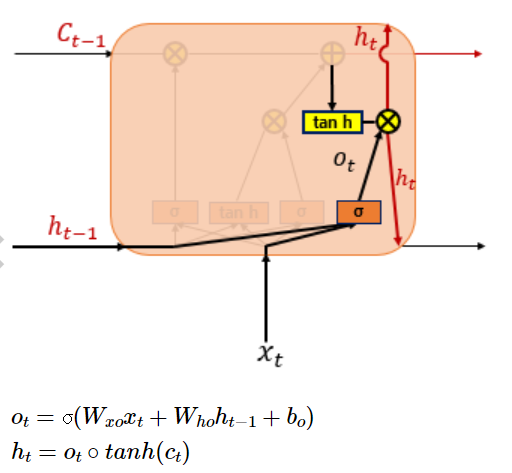

In [11]:
from IPython.display import Image
Image('./data/LSTM 출력게이트와 은닉상태.png')

* 출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값 -> 현재 시점 t의 은닉 상태 결정